<a href="https://colab.research.google.com/github/SolbiChoi/TeamProject/blob/master/food_good_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy wordcloud

In [ ]:
import pandas as pd
from konlpy.tag import Okt, Komoran, Kkma, Hannanum, Twitter, Mecab
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
text = pd.read_excel('./food_scraping.xlsx')
grade_4 = text['star grade'] >= 4.0

df_grade4 = text[grade_4]
df_grade4['star grade'].value_counts()

df_grade4.head(10)

,star grade,review
0,5.0,맛있고 음료처럼 먹을수있어서 조하용
1,5.0,음..꾸준히 사용해봤는데 큰효과는 못보긴 했지만.. 피로는 덜했습니다
2,5.0,요새 먹을일이 없어서 안먹고있네요.. 효과는 드라마틱 한게 아니니 잘 모르겠지만 맛...
3,4.0,그냥 피곤할때 때립니다
5,5.0,오리지널 맛이 가장 좋았습니다\n겨울에 따듯하게 먹기도좋습니다
7,5.0,확실히 시원하게 먹어야 맛있고 아침식사 못하고 바로 나가서 공부해야 하는데 머리가 ...
8,4.0,솔직히 피로회복은 모르겠는데 다음날 숙취해소는 좋네요 ㅋㅋ 수분이 싸악 보충되는듯
9,4.0,잘 마시긴 했었는데 그다지 큰 체감은 없었네요.
11,4.0,포카리 사먹는 게 나은 것 같습니다.
12,5.0,진짜 인생아이템!!재구매하러 갑니다


In [ ]:
x_data = text['review']
y_data = text['star grade']

In [ ]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [ ]:
y_data = y_data.apply(lambda val:make_y_data(val))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4788,), (4788,), (1596,), (1596,))

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0   100k      0 --:--:-- --:--:-- --:--:--  100k


In [ ]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

1167    너무 맛잇넛어요 ㅠㅠㅠ 다들 이 떡볶이 뭐냐고 물어보구요 덕분에 한끼 넉넉하게햇어요...
4955    선물세트로 펀딩했습니다한라봉이 상했었지만 메이커님의 신속하고 친절한 대응이 인상적이...
1697                                   맛있습니다 담기회 있으면 좋겠네요
5084                            맛은 살짝 아쉽지만 나름 만족하며 먹고있습니다
3881    외출을 삼가는 요즘 마법딸기와 함께 맘도 몸도 상큼아쉬운 점이 딱 하나 있습니다너무...
                              ...                        
3566    확실히 물이 많고 속이 빨간 부분도 있고 해서  좀 찝찝한 부분이 있긴 했으나 판매...
2019                    귀여운 병에 아기자기하게 배송 받았어요 달달하니 맛도 좋아요
2835    맛있네요다이어트용으로 샀는데 맛있어서 넘 마이먹고 살찔 것 같습니다 남녀노소 다 좋...
6014    맛이 엄청 기대되어서 펀딩해놓고 넘 기다렸는데요 역시 기대한만큼 진하고 단호박 풍미...
4101    맛도 괜찮고 든든해요 기다린 보람이 있어요ㅎㅎ 필요에 맞는 품목을 찾는다는건 어렵기...
Name: review, Length: 4788, dtype: object

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
import pickle
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [ ]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['너무',
  '맛',
  '잇',
  '넛',
  '어요',
  'ㅠㅠㅠ',
  '다',
  '떡볶이',
  '뭐',
  '냐고',
  '물',
  '어',
  '구요',
  '덕분',
  '끼',
  '넉넉',
  '게',
  '햇',
  '어요',
  '저',
  '개인',
  '파',
  '기름',
  '어서',
  '먹',
  '엇',
  '고',
  '오뎅',
  '을',
  '사',
  '서',
  '넣',
  '엇',
  '어요',
  '국물',
  '떡볶이',
  '지만',
  '약간',
  '걸죽한',
  '느낌',
  '라서',
  '맛',
  '잇',
  '어요'],
 ['선물',
  '세트',
  '로',
  '펀딩',
  '했',
  '습니다',
  '.',
  '한라',
  '봉',
  '상했었',
  '지만',
  '메이커',
  '님',
  '신속',
  '고',
  '친절',
  '대응',
  '인상',
  '었',
  '습니다',
  '.',
  '리워드',
  '었',
  '음',
  '도',
  '만족',
  '스러운',
  '펀딩',
  '었',
  '습니다',
  '.'],
 ['맛있', '습니다', '.', '담', '기', '회', '으면', '겠', '네요'],
 ['맛', '살짝', '아쉽', '지만', '나름', '만족', '며', '먹', '고', '습니다'],
 ['외출',
  '을',
  '삼가',
  '요즘',
  '마법',
  '딸기',
  '함께',
  '맘',
  '도',
  '몸',
  '도',
  '상큼',
  '^^',
  '아쉬운',
  '딱',
  '습니다',
  '너무',
  '금방',
  '바닥',
  '보여요',
  '큰',
  '사이즈',
  '화수분',
  '사이즈',
  '원해요'],
 ['구정',
  '펀딩',
  '보다',
  '생선',
  '크기',
  '작',
  '아요',
  '.',
  '아직',
  '먹',
  '진',
  '았',
  '는데',
  '그새',
 

In [ ]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
 text = tokenizer.word_index

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [ ]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(
font_path = './NanumGothicExtraBold.ttf', background_color='white',
colormap = "hot", width=3000, height=2000).generate_from_frequencies(text)



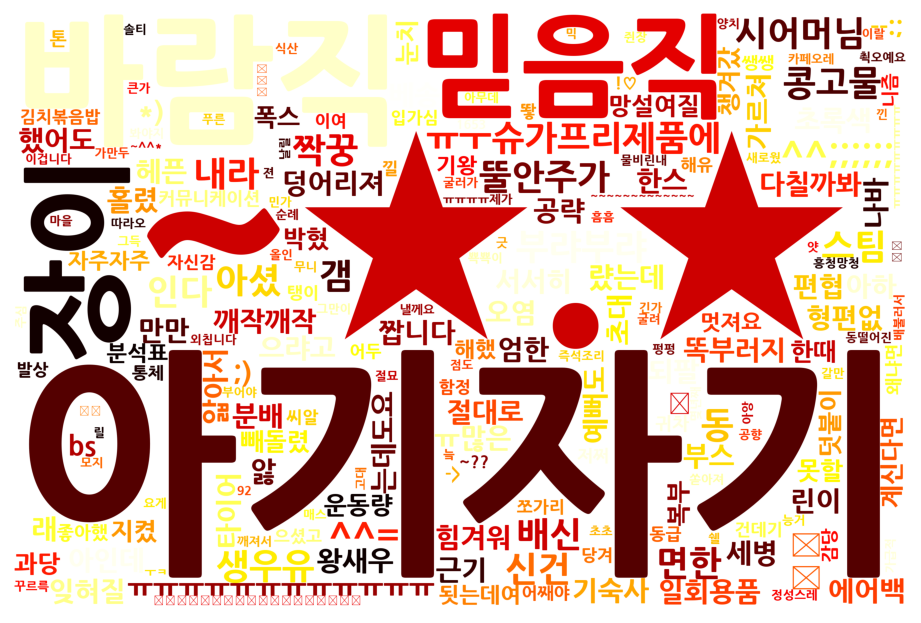

In [ ]:

plt.imshow(wordcloud) 

figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()